# Project1 - Navigation

the goal : collect as many bananas as possble while avoiding blue bananas.

### 1. Import Required Packages

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from dqnAgent import Agent
from collections import namedtuple, deque
import torch
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Road Unity Environment 

In this part, load unity environment and set brain 

In [2]:
env = UnityEnvironment(file_name="C:/Users/CuriousMode_1/deep-reinforcement-learning/p1_navigation/Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 3. Examine the State and Action Spaces

In [4]:
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

### 4. Make Agent 

In [5]:
agent = Agent(state_size=37, action_size=4, seed=0)

### 5. DQN Learning Code

In [6]:
def dqn(n_episodes=3000, max_t=1000, eps_start=1.0, eps_end=0.005, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode = True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        while True:
            action = agent.act(state, eps)
            action = np.int16(action).item()
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=16.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint2.pth')
            break
    return scores

In [7]:
scores = dqn()

Episode 100	Average Score: 0.55
Episode 200	Average Score: 2.92
Episode 300	Average Score: 6.91
Episode 400	Average Score: 9.84
Episode 500	Average Score: 12.07
Episode 600	Average Score: 13.97
Episode 700	Average Score: 14.59
Episode 800	Average Score: 14.94
Episode 900	Average Score: 15.29

Environment solved in 878 episodes!	Average Score: 16.57


### 6. Plot of reward per episode

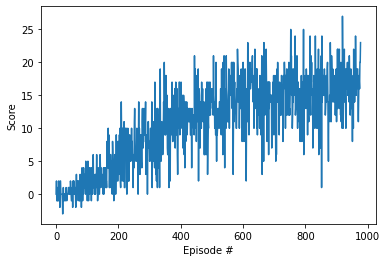

In [8]:
# whole episode score graph 
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

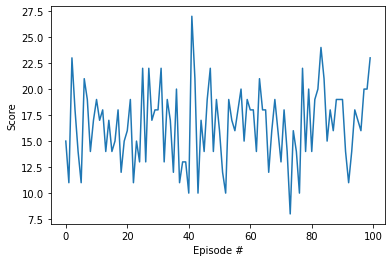

In [9]:
# last 100 episode score graph 
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores[-100:])), scores[-100:])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 7. Play Game With Trained Model

In [10]:
agent.qnetwork_local.load_state_dict(torch.load('checkpoint2.pth'))

eps = 0.01
for i in range(3):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0  
    while True:
        action = agent.act(state, eps)     # select an action
        action = np.int16(action).item()
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state 
        if done:
            break 

In [11]:
env.close()